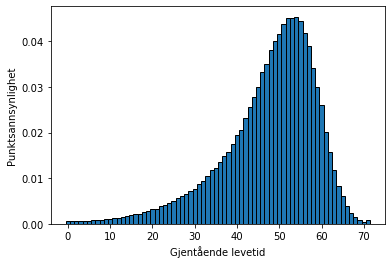

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

dod = read_csv('https://www.uio.no/studier/emner/matnat/math/STK1100/v20/dodssannsynlighet-felles.txt', sep='\t')
age = dod['ald'].values
prob = dod['dod'].values

age = age[:72]
prob = prob[35:]

qx = prob/1000

Fx = 1 - np.cumprod(1-qx)

temp = np.zeros(len(Fx))
temp[1:] = Fx[:-1]
px = Fx - temp

plt.bar(age, px, width=1, edgecolor='black')
plt.xlabel('Gjentående levetid')
plt.ylabel('Punktsannsynlighet')
plt.show()


In [57]:
hx = (1e5/1.03**32)*((1-(1/1.03)**(age-31))/(1-(1/1.03))) * (age>=32)
Ex_h = np.sum(hx*px)
print(f'Forventet nåverdi av pensjonsutbetalinger: {Ex_h:.0f} kr.')

Forventet nåverdi av pensjonsutbetalinger: 501512 kr.


In [58]:
gx = (1-(1/1.03)**(age+1))/(1-(1/1.03)) * (age<=31) \
   + (1-(1/1.03)**(32))/(1-(1/1.03))
Ex_g = np.sum(gx*px)
Ex_g

22.549276707232753

In [59]:
K = Ex_h / Ex_g
print(f'Årlig premie K: {K:.0f} kr.')

Årlig premie K: 22241 kr.
